### Cancer is the second leading cause of death in the United States, exceeded only by heart disease. One of every four deaths in the United States is due to cancer. 
### From 2011-2015, 8,042,396 new cases of cancer were reported, and 2,931,769 people died of cancer in the United States. For every 100,000 people, 449 new cancer cases were reported and 164 died of cancer. 

In [72]:
import pandas as pd
import numpy as np
import pandas_profiling

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context('poster')
sns.set(rc={'figure.figsize':(11.7,8.27)})

pd.set_option('display.max_columns', 500) 
%matplotlib inline

import plotly
import plotly.plotly as py
import plotly.figure_factory as ff


from plotly.offline import iplot, init_notebook_mode

import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)


plotly.__version__

import geopandas
import shapely

plotly.tools.set_credentials_file(username='ashu.ingenuity@gmail.com', api_key='yvO5VATu1byoKNShHVN0')


# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import os
from IPython.display import Image, display, HTML

'3.3.0'

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
#!pip install -U -q ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

In [75]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [76]:
print(matplotlib.backends.backend)

module://ipykernel.pylab.backend_inline


# Reading Cancer death and new case rate of caner all over USA for Bkgd

In [77]:
death_usa = pd.read_csv('./data/background_analysis/All USA cancer death rate 2011-2015.csv')
case_usa = pd.read_csv('./data/background_analysis/All USA new cases rate 2011-2015.csv')

In [78]:
death_usa = death_usa.drop(['CancerType', 'Year', 'Sex', 'DeathCount','Population'], axis=1)
case_usa = case_usa.drop(['CancerType', 'Year', 'Sex', 'CaseCount','Population'], axis=1)

In [79]:
death_usa = death_usa.rename(index = str, columns = {'Area' : 'State', 'AgeAdjustedRate' : 'Death_Rate'}) 
case_usa = case_usa.rename(index = str, columns = {'Area' : 'State', 'AgeAdjustedRate' : 'Case_Rate'})

In [80]:
allUSA = pd.merge(death_usa, case_usa, on = 'State')

In [81]:
allUSA.describe()

,Death_Rate,Case_Rate
count,51.000000,51.000000
mean,165.703922,452.419608
std,15.219947,30.821064
min,127.200000,375.500000
25%,155.850000,436.950000
50%,165.200000,457.800000
75%,175.450000,468.950000
max,199.300000,520.300000


In [82]:
allUSA.head()

,State,Death_Rate,Case_Rate
0,Utah,127.2,407.3
1,Hawaii,136.1,415.7
2,Arizona,145.2,388.5
3,California,147.5,411.2
4,Colorado,139.6,404.7


In [83]:
allUSA.columns

Index(['State', 'Death_Rate', 'Case_Rate'], dtype='object')

## National Cancer Statistics: All Types of Cancer, All Ages, All Races/Ethnicities, Male and Female, Rate per 100,000 people in year 2011-2015

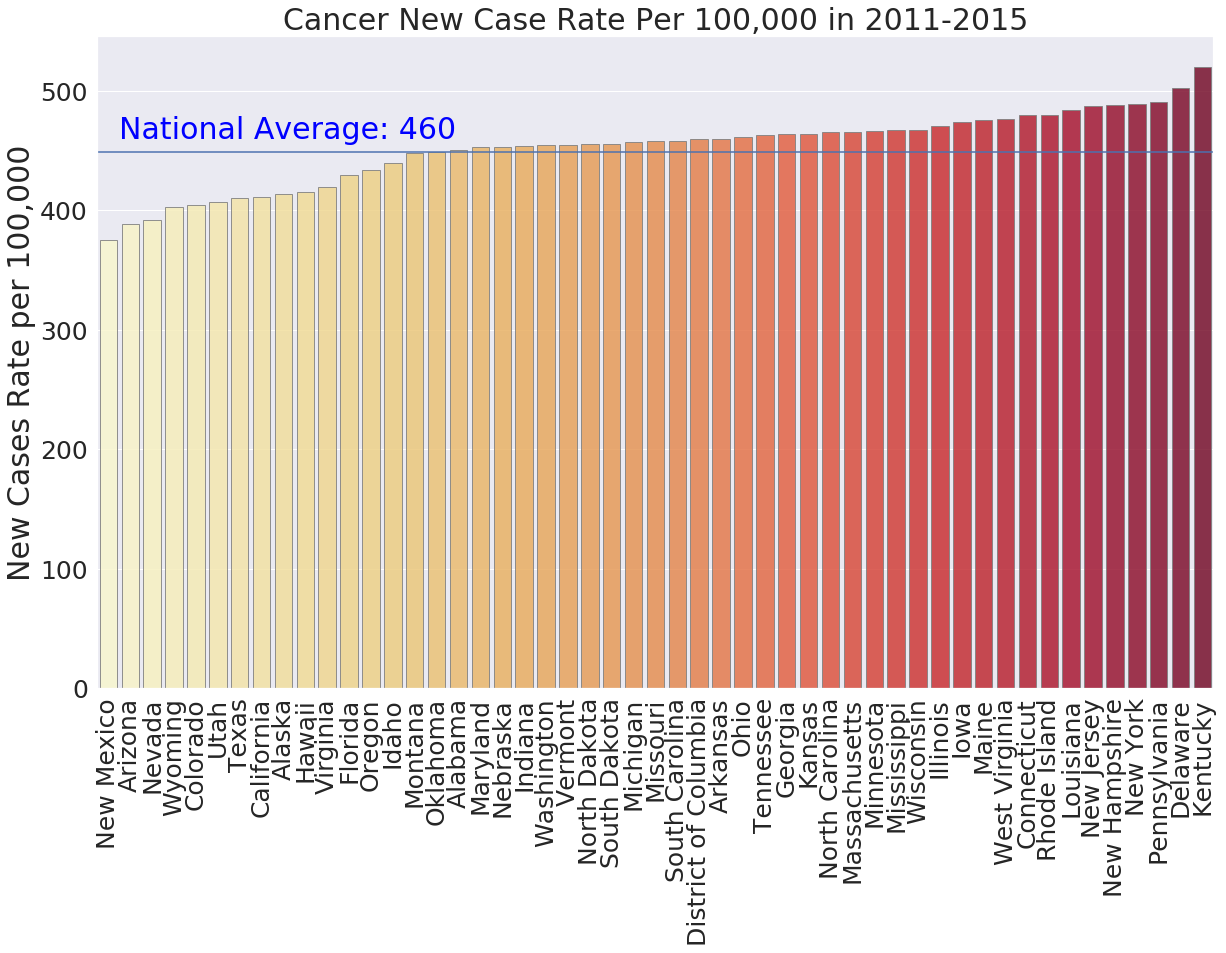

In [84]:
plt.figure(figsize=(20,12))
allUSA.sort_values(['Case_Rate'], inplace=True)
mean = allUSA.Case_Rate.mean()

ax = sns.barplot(y= 'Case_Rate', x='State', data= allUSA, palette=("YlOrRd"), edgecolor='grey', alpha = 0.85)

ax.axhline(449, ls='-')
ax.text(0.5,460, "National Average: 460", fontsize = 30, color = 'blue')


ax.set_ylabel('New Cases Rate per 100,000', fontsize = 30)
ax.set_xlabel('')
ax.set_title('Cancer New Case Rate Per 100,000 in 2011-2015', fontsize = 30)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25, rotation=90)
plt.show();

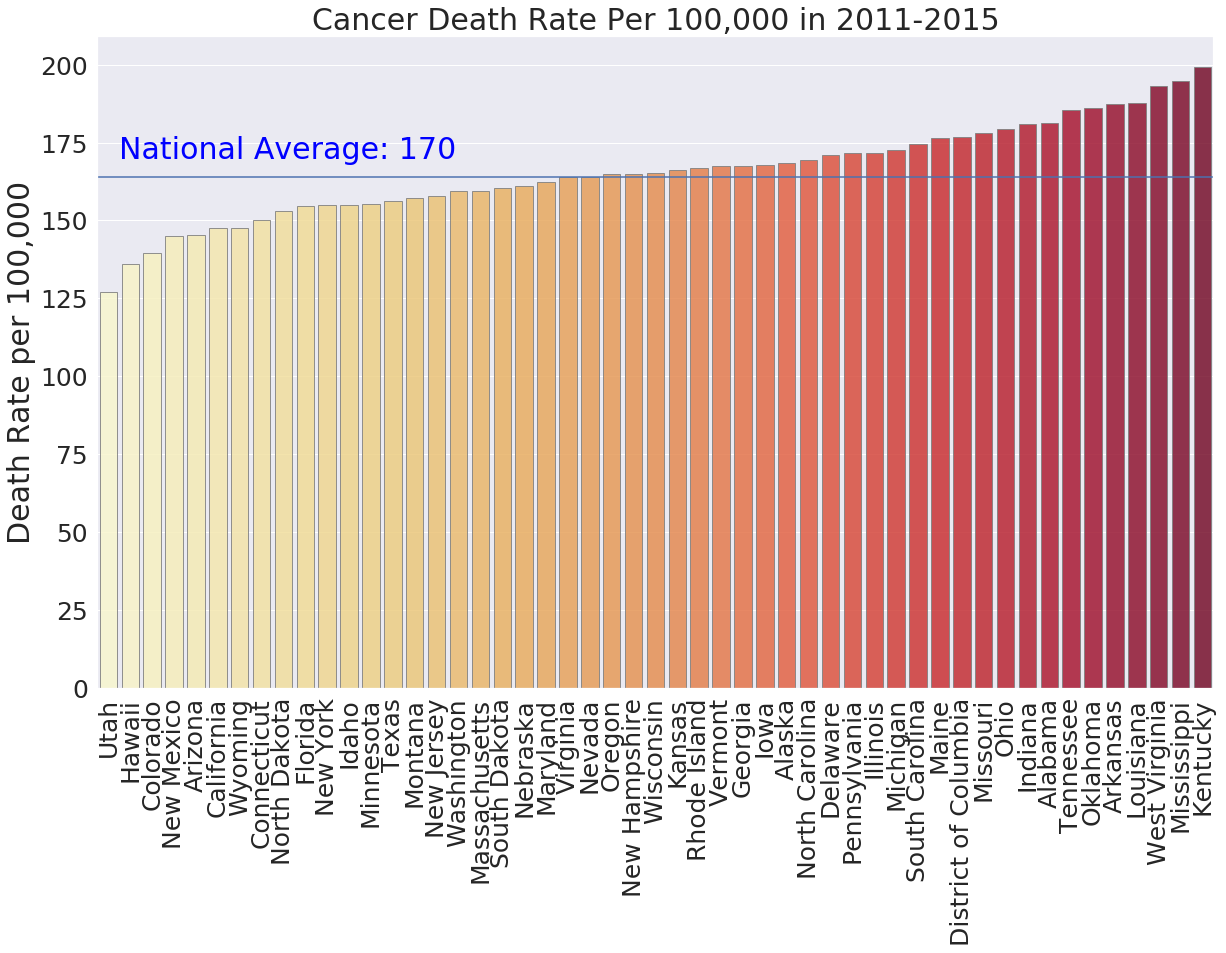

In [85]:
plt.figure(figsize=(20,12))
allUSA.sort_values(['Death_Rate'], inplace=True)
mean = allUSA.Death_Rate.mean()

ax = sns.barplot(y= 'Death_Rate', x='State', data= allUSA, palette=("YlOrRd"), edgecolor='grey', alpha = 0.85)

ax.axhline(164, ls='-')
ax.text(0.5,170, "National Average: 170", fontsize = 30, color = 'blue')


ax.set_ylabel('Death Rate per 100,000', fontsize = 30)
ax.set_xlabel('')
ax.set_title('Cancer Death Rate Per 100,000 in 2011-2015', fontsize = 30)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25, rotation=90);

In [86]:
#allUSA.sort_values(['Case_Rate'], inplace=True)
#ax = sns.barplot(x= 'Case_Rate',  y='State', data= allUSA, palette=("YlOrRd"), edgecolor='lightgrey')
#ax.set_xlabel('New Cases Rate per 100,000')
#ax.set_ylabel('')
#ax.set_title('Cancer New Cases Rate Per 100,000 in 2011-2015');

# Reading master data frame for EDA

In [87]:
master = pd.read_csv('./master.csv')

In [88]:
master.head()

,FIPS,State,County,Child_Mortality_Rate,Infant_Mortality_Rate,pct_Diabetic,HIV_Prevalence_Rate,pct_Food_Insecure,pct_Limited_Access_to_healthy_foods,Drug_Overdose_Mortality_Rate,MV_Mortality_Rate,pct_Insufficient_Sleep,Household_Income,pct_Homeowners,pct_African_American,pct_American_Indian_Alaskan_Native,pct_Asian,pct_Native_Hawaiian_Other_Pacific_Islander,pct_Hispanic,pct_Non_Hispanic_White,level_0,pct_Fair_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,pct_LBW,pct_Smokers,pct_Obese,Food_Environment_Index,pct_Physically_Inactive,pct_access_excercise,pct_Excessive_Drinking,pct_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,pct_Uninsured,PCP_Rate,Dentist_Rate,MHP_Rate,Preventable_Hosp._Rate,pct_Screened,pct_Vaccinated,Graduation_Rate,pct_Some_College,pct_Unemployed,pct_Children_in_Poverty,Income_Ratio,Violent_Crime_Rate,Injury_Death_Rate,Average_Daily_PM2.5,Presence_of_violation,pct_Severe_Housing_Problems,Case_Rate,Death_Rate
0,13001,Georgia,Appling,59.436970,7.636473,12.9,172.0,14.3,6.773041,18.51183,23.225027,36.040842,40862,71.859147,18.595108,0.577723,0.788294,0.205173,10.258625,69.051347,1,20.860321,4.315623,4.167643,9.866512,20.200401,36.1,7.5,27.2,27.648607,14.686055,24.000000,536.5,66.978193,17.608928,43.412200,16.19783,37.794940,7080.0,37.0,30.0,82.683983,38.746241,5.528561,33.5,5.098134,379.198267,80.101317,10.6,No,10.205580,402.5,179.5
1,13003,Georgia,Atkinson,69.199726,7.636473,12.8,240.8,12.8,12.267063,18.51183,36.068220,38.392034,34821,74.074074,16.099257,1.498442,0.911053,1.066890,24.814193,56.808919,2,26.766415,4.863178,4.439941,7.602957,23.552669,32.1,7.3,28.2,0.000000,14.423521,37.500000,428.7,78.017664,24.172885,47.606706,11.98753,105.250941,7663.0,35.0,36.0,87.037037,35.566038,4.495192,36.5,4.226623,320.081387,105.957713,10.4,No,15.884477,427.4,203.0
2,13005,Georgia,Bacon,69.199726,7.636473,12.4,468.6,13.2,5.476352,18.51183,31.690498,36.434163,38417,70.719479,16.043820,0.353388,0.600760,0.167859,8.905380,72.877463,3,19.157643,4.331201,4.020762,9.456740,19.999158,33.0,7.8,28.9,61.094088,15.757069,23.529412,522.2,47.545419,18.625040,43.967640,26.50411,8.834700,7038.0,36.0,32.0,84.671533,42.101740,4.537419,42.7,5.370769,320.081387,88.515942,10.4,No,10.126582,452.9,215.3
3,13007,Georgia,Baker,69.199726,7.636473,16.5,296.9,16.5,30.546437,18.51183,21.635442,37.560492,37286,69.341408,44.593750,0.468750,1.093750,0.062500,5.687500,47.312500,4,18.512541,3.903933,3.786131,13.551402,18.219631,32.5,5.0,27.4,5.824399,13.818968,60.000000,408.8,36.474164,16.065054,47.606706,0.00000,31.250000,7961.0,55.0,22.0,90.000000,49.513213,6.311475,40.0,6.141633,320.081387,68.212824,10.8,No,11.627907,461.8,110.5
4,13009,Georgia,Baldwin,97.237316,9.987516,12.4,319.9,22.6,9.319845,18.51183,15.711363,38.618257,40358,55.137783,42.199261,0.345165,1.719147,0.077941,2.280319,52.373848,5,23.503294,4.702728,4.250728,12.649628,24.107593,34.1,5.8,23.9,63.007437,13.976129,19.444444,635.7,17.809268,15.034754,57.593480,40.08373,133.612430,5451.0,40.0,40.0,88.813559,52.376673,5.944429,32.5,6.157213,689.414434,72.101540,11.4,Yes,20.025031,479.0,188.5


In [89]:
master = master.drop(['level_0'], axis=1)

In [90]:
master = master.drop (['Presence_of_violation'], axis =1)

In [91]:
#master.loc[master.County.str.contains('Union')]

#### Florida 'Union' county is outlier and we are replacing its cancer rate or death rate with median of Florida: Case_rate : 422.7 and Death_Rate: 174.90

In [92]:
master.at[342, 'Case_Rate'] = 422.7
master.at[342, 'Death_Rate'] = 174.90

In [93]:
#master.iloc[342]

DEATH RATE or NEW CASES FOR MULTIPLE DATA YEARS: Death rates are calculated based on the sum of the resident populations for each of the data years involved (e.g. the denominator of a rate for 2005-2011 combined is the sum of the population estimates for 2005, 2006, 2007, 2008, 2009, 2010 and 2011). 

# HealthyPeople.gov intitated a goal-oriented approach to reduce cancer deaths and set the targets for 2020.
### Baseline (Year): 179.3 (2007)
### Target: 161.4 for 2020
Target-Setting Method: 10 percent improvement
Numerator: Number of deaths due to cancer (ICD-10 codes C00-C97).

In 2013, rates for 2007–2009 were revised using intercensal population estimates based on the 2000 and 2010 censuses instead of the postcensal estimates for the denominator to provide more accurate rates for the period. Thus, the original baseline was revised from 178.4 to 179.3. The target was adjusted from 160.6 to 161.4 to reflect the revised baseline using the original target-setting method. Note that all mortality rates shown here for 2001–2009 (or any subset of those years) are based on intercensal population estimates and may differ from those previously published on the Internet or in print. In 2015, the denominator data source name was revised from Population Estimates to Bridged-Race Population Estimates for Census 2000 and 2010. The numerator data source, baseline estimate, target, and target-setting method remain unchanged. In 2017, the estimates for geographic location were updated to reflect the 2013 urban/rural classification scheme.
More Reading: https://www.healthypeople.gov/node/4047/data_details#revision_history_header

## Based on the target cancer death rate mentioned by healthypeople.gov I am categorizing the counties >161.4 for above baseline (ABL) or <161.4 to below base line (BBL). 

In [94]:
master['Deaths_Above_Baseline'] = master['Death_Rate'].apply(lambda x: 1 if x > 161  else 0)

In [95]:
master['Cases_Above_Average'] = master['Case_Rate'].apply(lambda x: 1 if x > 450.0  else 0)

# EDA

## Here I'm going to try cufflinks+plotly combination to make an interactive plot with interactive IPython widget controls.

In [96]:
@interact
def scatter_plot(x=list(master.select_dtypes('number').columns)[1:47], 
                 y=list(master.select_dtypes('number').columns)[47:52]
                 #
                 ):
    print(f"Correlation': {master[x].corr(master[y])}")
    master.iplot(kind='scatter', x=x, y=y, 
                 mode='markers',
                 xTitle=x.title(), yTitle=y.title(),
                 theme='ggplot',
                 colorscale='ggplot')

    #theme=list(cf.themes.THEMES.keys()), colorscale=list(cf.colors._scales_names.keys()) 
    #add after the # tag

interactive(children=(Dropdown(description='x', options=('Child_Mortality_Rate', 'Infant_Mortality_Rate', 'pct…

In [97]:
#@interact
#def show_newcases_more_than(column=['Case_Rate', 'Death_Rate'], x=(1, 600, 1)):
    #return master.loc[master[column] > x]

In [98]:
#@interact
#def correlations(column1=list(master.select_dtypes(include=[np.float64]).columns), 
                #column2=list(master.select_dtypes(include=[np.float64]).columns)):
    #print(f"correlation': {master[column1].corr(master[column2])}")

In [99]:
# Tried out new Pandas profiling for EDA, which helped me in removing some reduntant columns
#profile_master = pandas_profiling.ProfileReport(master)
#profile_master.to_file(outputfile="master_3.html");

## Lets start with visualizing county-wise disparity of cancer deaths and new cases rate

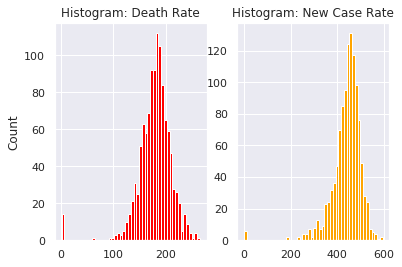

In [100]:
plt.subplot(1, 2, 2)
plt1 = master.Case_Rate.hist(bins=50, color = 'orange')
plt.title('Histogram: New Case Rate')
plt.ylabel('Count')


plt.subplot(1, 2, 1)
plt2 = master.Death_Rate.hist(bins=50, color= 'red')
plt.title('Histogram: Death Rate')
plt.ylabel('Count')

plt.show();


In [101]:
fips = master.FIPS
scope=['Arkansas', 'Alabama', 'Texas', 'Mississipi', 'Louisiana', 'Tennessee', 'North Carolina', 'South Caroline', 'Virginia', 'Florida']
values =master.Case_Rate.astype(int)
fig = ff.create_choropleth(fips=fips, values=values, 
                           scope=scope,
                           binning_endpoints = [250, 300, 350, 400, 450, 500], 
                           colorscale = [ 
                               '#f0f0f0', '#fff7bc','#fee8c8', '#fec44f','#fd8d3c','#e31a1c','#67001f'
                           ],
                           state_outline={'color': 'darkgrey', 'width': 0.75},
                           county_outline={'color': 'white', 'width': 0.25},
                           round_legend_values=True,
                           legend_title='Cases per 100,000', 
                            title='Average Annual Rate of New Cases per 100,000 (2011-2015)'
)
fig['layout']['legend'].update({'x': 0})
fig['layout']['annotations'][0].update({'x': -0.12, 'xanchor': 'left'})
py.iplot(fig, filename='Average Annual Rate of New Cases per 100,000 (2011-2015)')

In [102]:
master_TN = master[master['State'] == 'Tennessee']
values = master_TN.Case_Rate.astype(int)
fips = master_TN.FIPS
scope=['Tennessee']
fig = ff.create_choropleth(fips=fips, values=values, 
                           scope=scope,
                           binning_endpoints = [250, 300, 350, 400, 450, 500], 
                           colorscale = [
                            '#f0f0f0', '#fff7bc','#fee8c8', '#fec44f','#fd8d3c','#e31a1c','#67001f'
                           ],
                           state_outline={'color': 'darkgrey', 'width': 0.75},
                           county_outline={'color': 'white', 'width': 0.5},
                           round_legend_values=True,
                           legend_title='Cases per 100,000', 
                            title='TN: Average Annual Rate of New Cases per 100,000 (2011-2015)'
)
fig['layout']['legend'].update({'x': 0})
fig['layout']['annotations'][0].update({'x': -0.12, 'xanchor': 'left'})
py.iplot(fig, filename='TN: Average Annual Rate of New Cases per 100,000 (2011-2015)')

In [103]:
master_TN = master[master['State'] == 'Tennessee']
values_deaths = master_TN.Death_Rate.astype(int)
fips = master_TN.FIPS
scope=['Tennessee']
fig = ff.create_choropleth(fips=fips, values=values_deaths, 
                           scope=scope,
                           binning_endpoints = [10, 50, 100, 150, 200, 300], 
                           colorscale = [
                            '#f0f0f0', '#fff7bc','#fee8c8', '#fec44f','#fd8d3c','#e31a1c','#67001f'
                           ],
                           state_outline={'color': 'darkgrey', 'width': 0.75},
                           county_outline={'color': 'white', 'width': 0.5},
                           round_legend_values=True,
                           legend_title='Cases per 100,000', 
                            title='TN: Average Annual Rate of Deaths per 100,000 (2011-2015)'
)
fig['layout']['legend'].update({'x': 0})
fig['layout']['annotations'][0].update({'x': -0.12, 'xanchor': 'left'})
py.iplot(fig, filename='TN: Average Annual Rate of Deaths per 100,000 (2011-2015)')


In [104]:
fips = master.FIPS
scope=['Arkansas', 'Alabama', 'Texas', 'Mississipi', 'Louisiana', 'Tennessee', 'North Carolina', 'South Caroline', 'Virginia', 'Florida']
values =master.Death_Rate.astype(int)
fig = ff.create_choropleth(fips=fips, values=values, 
                           scope=scope,
                           binning_endpoints = [10, 50, 100, 150, 200, 300], 
                           colorscale = [
                            '#f0f0f0', '#fff7bc','#fee8c8', '#fec44f','#fd8d3c','#e31a1c','#67001f'
                           ],
                           county_outline={'color': 'white', 'width': 0.25},
                           round_legend_values=True,
                           legend_title='Cases per 100,000', 
                            title='Average Annual Rate of Deaths per 100,000 (2011-2015)'
)
fig['layout']['legend'].update({'x': 0})
fig['layout']['annotations'][0].update({'x': -0.12, 'xanchor': 'left'})
py.iplot(fig, filename='Average Annual Rate of Deaths per 100,000 (2011-2015)')

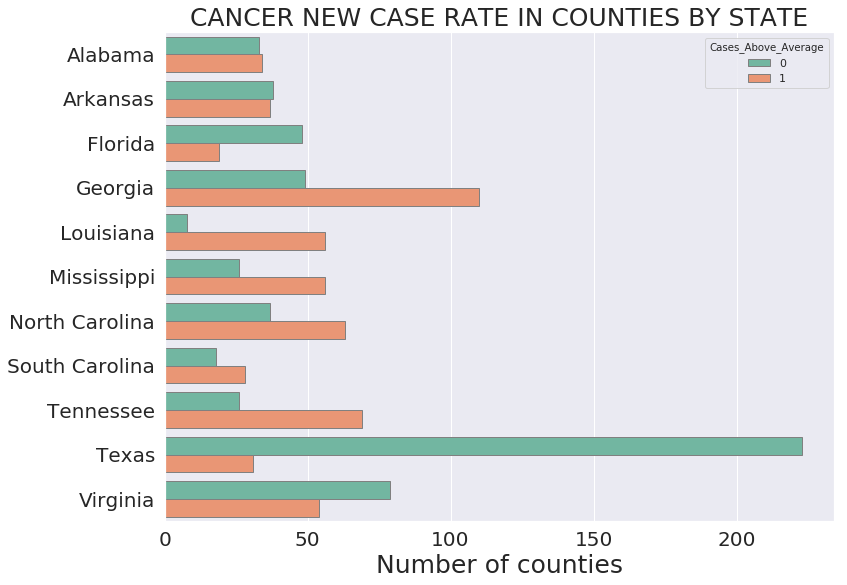

In [105]:
plt.rcParams["figure.figsize"] = (12,9)
ax = sns.countplot(y= 'State',  hue = 'Cases_Above_Average', palette="Set2", edgecolor='grey', alpha = 1,
                   data = master.groupby(["State"]).apply(lambda x: x.sort_values(["Cases_Above_Average"], 
                                                                                  ascending = True)))
ax.set_title('CANCER NEW CASE RATE IN COUNTIES BY STATE', fontsize = 25)
ax.set_ylabel('', fontsize = 25)
ax.set_xlabel('Number of counties', fontsize = 25)
plt.xticks(fontsize = 20, rotation = 0)
plt.yticks(fontsize = 20)

plt.show();

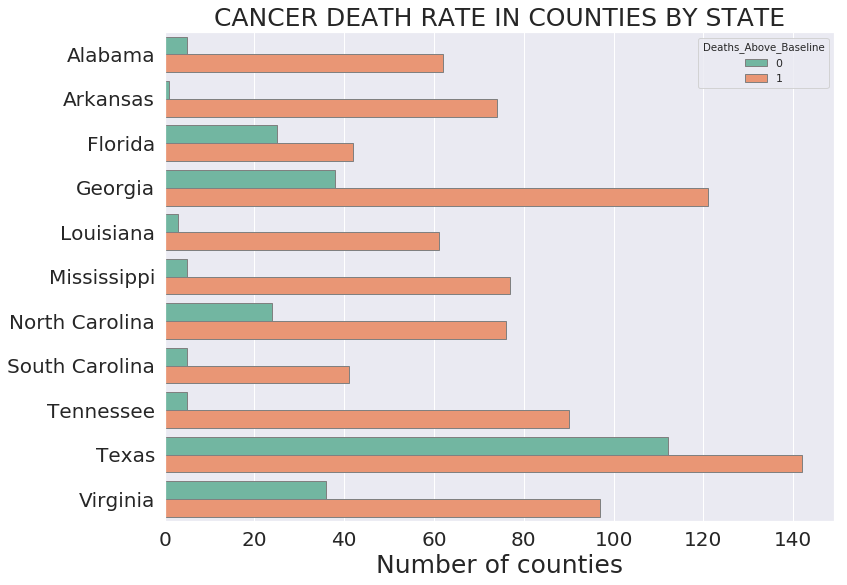

In [106]:
plt.rcParams["figure.figsize"] = (12,9)
ax = sns.countplot(y= 'State',  hue = 'Deaths_Above_Baseline', palette="Set2", edgecolor='grey', alpha = 1,
                   data = master.groupby(["State"]).apply(lambda x: x.sort_values(["Deaths_Above_Baseline"], 
                                                                                  ascending = True)))
ax.set_title('CANCER DEATH RATE IN COUNTIES BY STATE', fontsize = 25)
ax.set_ylabel('', fontsize = 25)
ax.set_xlabel('Number of counties', fontsize = 25)
plt.xticks(fontsize = 20, rotation = 0)
plt.yticks(fontsize = 20)
plt.show();

In [107]:
#ax = sns.swarmplot(x= 'State', y = 'Deaths_AgeAdj_Rate', hue="Presence_of_violation", data = master)

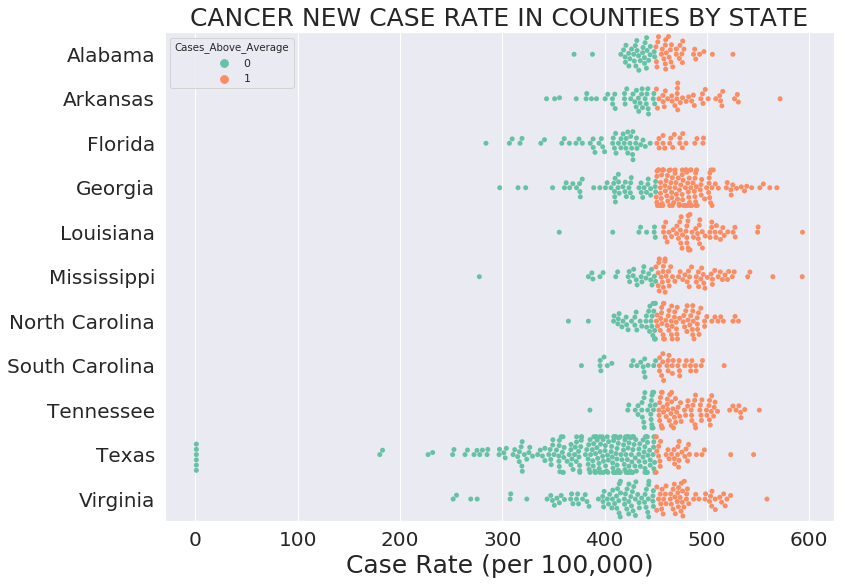

In [108]:
#Cancer Case rate by state
#data = master.sort_values(by=['Death_Rate'])
plt.rcParams["figure.figsize"] = (12,9)
ax = sns.swarmplot(y= 'State', x = 'Case_Rate', hue="Cases_Above_Average", palette="Set2",
                   data = master.groupby(["State"]).apply(lambda x: x.sort_values(["Death_Rate"], ascending = False)))
#ax = sns.boxplot(y= 'State', x = 'Case_Rate', data = master.groupby(["State"]).apply(lambda x: x.sort_values(["Death_Rate"], ascending = False)))
#ax.set(xlabel='STATE', ylabel='Case Rate (per 100,000)', title= 'CANCER NEW CASE RATE IN COUNTIES BY STATE')
ax.set_title('CANCER NEW CASE RATE IN COUNTIES BY STATE', fontsize = 25)
ax.set_ylabel('', fontsize = 25)
ax.set_xlabel('Case Rate (per 100,000)', fontsize = 25)
plt.xticks(fontsize = 20, rotation = 0)
plt.yticks(fontsize = 20)
plt.show();

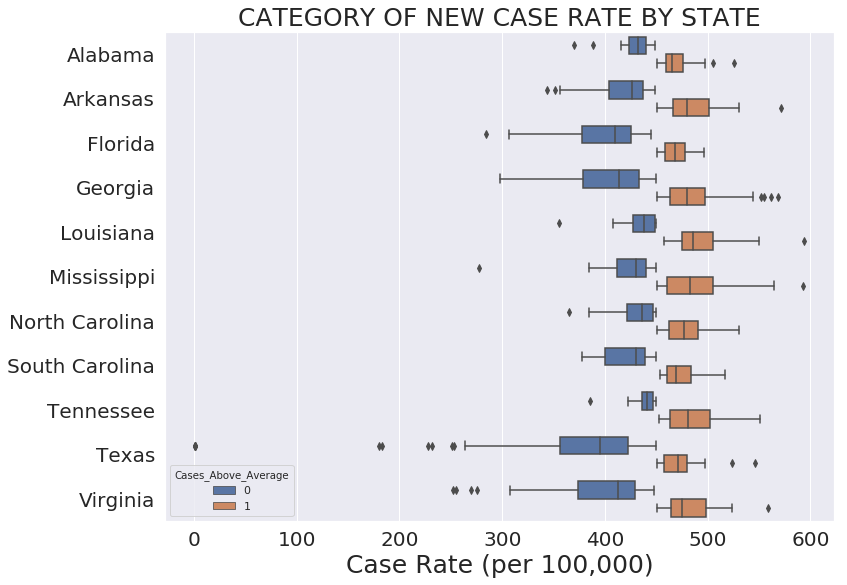

In [109]:
plt.rcParams["figure.figsize"] = (12,9)
ax = sns.boxplot(y= 'State', x = 'Case_Rate', hue = "Cases_Above_Average", data = master.groupby(["State"]).apply(lambda x: x.sort_values(["Death_Rate"], ascending = False)))
ax.set_title('CATEGORY OF NEW CASE RATE BY STATE', fontsize = 25)
ax.set_ylabel('', fontsize = 25)
ax.set_xlabel('Case Rate (per 100,000)', fontsize = 25)
plt.xticks(fontsize = 20, rotation = 0)
plt.yticks(fontsize = 20)
plt.show();

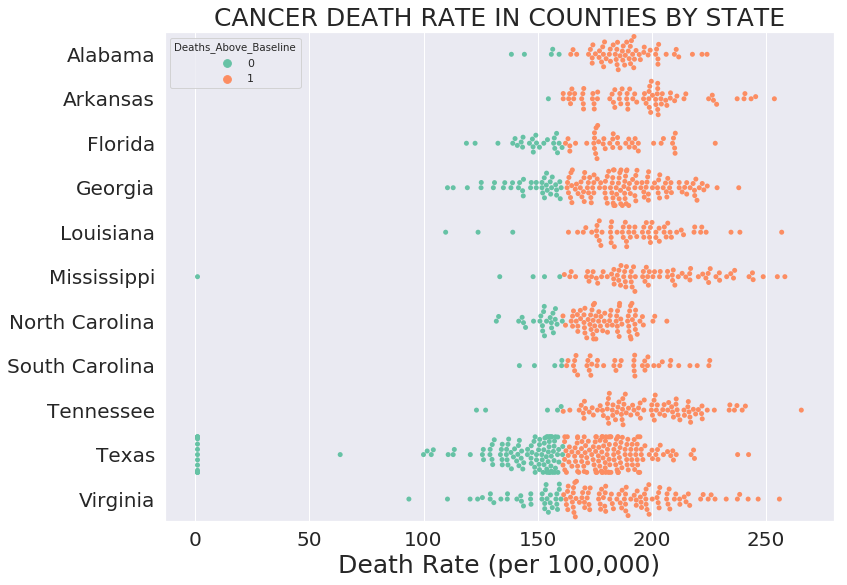

In [110]:
#Cancer Death rate by state
#data = master.sort_values(by=['Death_Rate'])
plt.rcParams["figure.figsize"] = (12,9)
ax = sns.swarmplot(y= 'State', x = 'Death_Rate', hue="Deaths_Above_Baseline", palette="Set2",
                   data = master.groupby(["State"]).apply(lambda x: x.sort_values(["Death_Rate"], ascending = False)))
#ax = sns.boxplot(y= 'State', x = 'Death_Rate', data = master.groupby(["State"]).apply(lambda x: x.sort_values(["Death_Rate"], ascending = False)))
#ax.set(xlabel='STATE', ylabel='Cancer Death Rate (per 100,000)', title= 'CANCER DEATH RATE IN COUNTIES BY STATE')
ax.set_title('CANCER DEATH RATE IN COUNTIES BY STATE', fontsize = 25)
ax.set_ylabel('', fontsize = 25)
ax.set_xlabel('Death Rate (per 100,000)', fontsize = 25)
plt.xticks(fontsize = 20, rotation = 0)
plt.yticks(fontsize = 20)
plt.show();

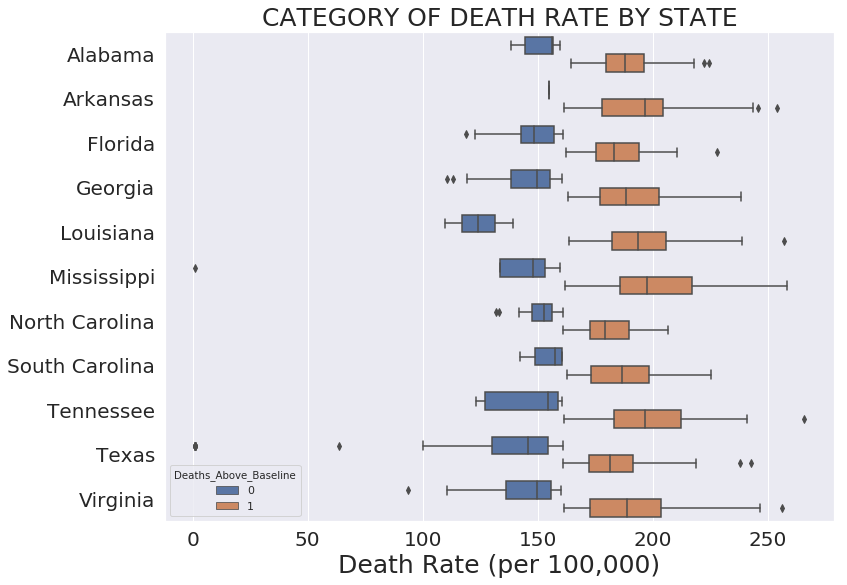

In [111]:
plt.rcParams["figure.figsize"] = (12,9)
ax = sns.boxplot(y= 'State', x = 'Death_Rate', hue = "Deaths_Above_Baseline", data = master.groupby(["State"]).apply(lambda x: x.sort_values(["Death_Rate"], ascending = False)))
ax.set_title('CATEGORY OF DEATH RATE BY STATE', fontsize = 25)
ax.set_ylabel('', fontsize = 25)
ax.set_xlabel('Death Rate (per 100,000)', fontsize = 25)
plt.xticks(fontsize = 20, rotation = 0)
plt.yticks(fontsize = 20)
plt.show();